<a href="https://colab.research.google.com/github/sk-6113/cognifyz_04/blob/main/cognifyz_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

/tmp/ipython-input-2841680667.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='restaurant_count', palette='viridis')


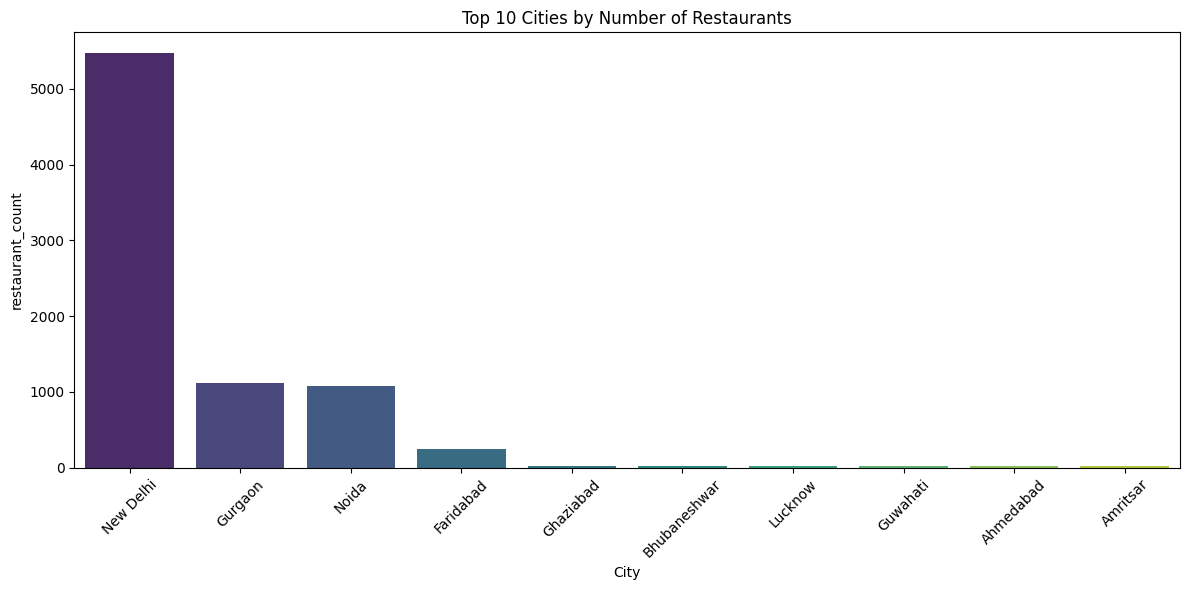

/tmp/ipython-input-2841680667.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Aggregate rating', palette='magma')


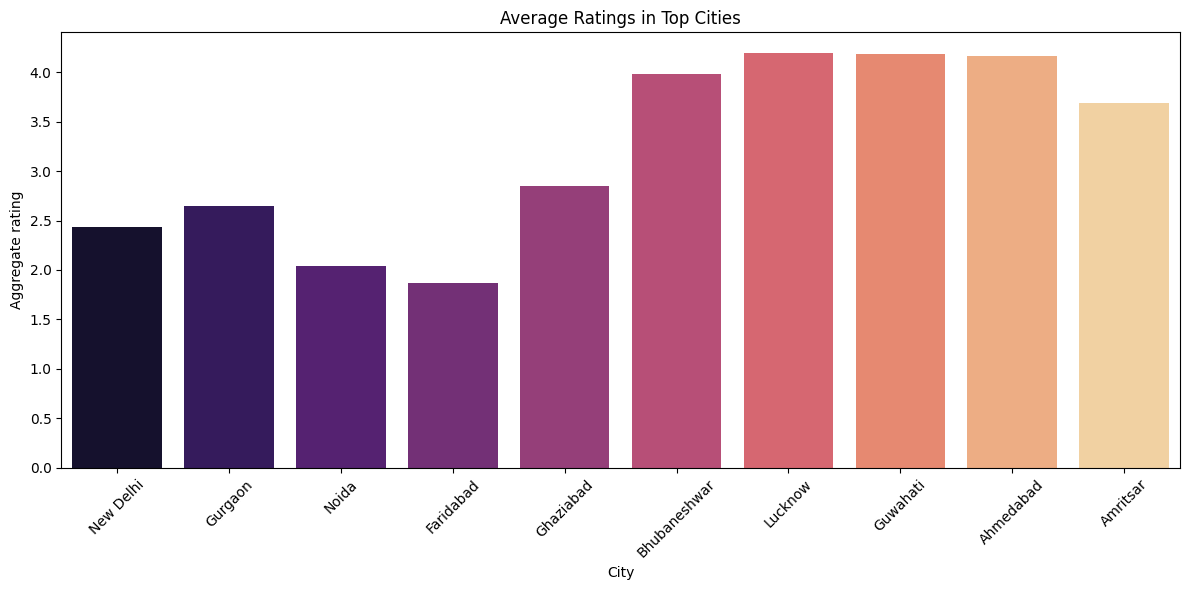

        City                                          Cuisines  count
0  Abu Dhabi                                          American      2
1       Agra                             North Indian, Mughlai      5
2  Ahmedabad  Cafe, American, Continental, Armenian, Fast Food      1
3     Albany                            Japanese, Steak, Sushi      2
4  Allahabad                             North Indian, Chinese      3
5   Amritsar                                      North Indian      7
6     Ankara                              Kebab, Turkish Pizza      4
7   Armidale                                   Bar Food, Steak      1
8     Athens                          American, Italian, Pizza      2
9   Auckland                                              Cafe      2
                 City  Price range
93          Panchkula     4.000000
133  Vineland Station     4.000000
97        Paynesville     4.000000
60       Johannesburg     4.000000
56         Inner City     4.000000
94         Pasay Cit

In [1]:
!pip install pandas folium seaborn matplotlib
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset .csv")

print(df.head())
import folium
from folium.plugins import MarkerCluster

lat_mean = df['Latitude'].mean()
lon_mean = df['Longitude'].mean()

restaurant_map = folium.Map(location=[lat_mean, lon_mean], zoom_start=12)
marker_cluster = MarkerCluster().add_to(restaurant_map)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}<br>Cuisine: {row['Cuisines']}",
    ).add_to(marker_cluster)

restaurant_map.save("restaurant_map.html")
grouped = df.groupby('City').agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).rename(columns={'Restaurant Name': 'restaurant_count'})

grouped = grouped.reset_index()

top_cities = grouped.sort_values(by='restaurant_count', ascending=False).head(10)
print(top_cities)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='restaurant_count', palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='City', y='Aggregate rating', palette='magma')
plt.title('Average Ratings in Top Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_cuisine_per_city = df.groupby(['City', 'Cuisines']).size().reset_index(name='count')
top_cuisine = top_cuisine_per_city.sort_values(['City', 'count'], ascending=[True, False])
top_cuisine = top_cuisine.groupby('City').first().reset_index()

print(top_cuisine.head(10))

avg_price = df.groupby('City')['Price range'].mean().reset_index().sort_values(by='Price range', ascending=False)
print(avg_price.head(10))
top_rated_cities = grouped.sort_values(by='Aggregate rating', ascending=False).head(5)
print("Top rated cities:\n", top_rated_cities)

expensive_cities = grouped.sort_values(by='Price range', ascending=False).head(5)
print("Most expensive cities:\n", expensive_cities)

correlation = df[['Aggregate rating', 'Price range']].corr()
print("Correlation between rating and price_range:\n", correlation)
